In [424]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay


In [425]:
dataset = pd.read_csv('../data/heart_failure/heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [426]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [427]:
dataset['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [428]:
# Random sampling
# train = dataset.sample(frac=0.8)
# test = dataset.drop(train.index)

#Stratified sampling
trainvalidation = dataset.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.8)
test = dataset.drop(trainvalidation.index)
train = trainvalidation.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.75)
validation = trainvalidation.drop(train.index)

print(train['DEATH_EVENT'].value_counts()/train.shape[0])
print(validation['DEATH_EVENT'].value_counts()/validation.shape[0])
print(test['DEATH_EVENT'].value_counts()/test.shape[0])

DEATH_EVENT
0    0.677778
1    0.322222
Name: count, dtype: float64
DEATH_EVENT
0    0.677966
1    0.322034
Name: count, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: count, dtype: float64


In [429]:
train_features = train.drop('DEATH_EVENT', axis=1)
train_targets = train['DEATH_EVENT']
validation_features = validation.drop('DEATH_EVENT', axis=1)
validation_targets = validation['DEATH_EVENT']
test_features = test.drop('DEATH_EVENT', axis=1)
test_targets = test['DEATH_EVENT']

In [430]:
dt1 = DecisionTreeClassifier()
dt1.fit(train_features, train_targets)

DecisionTreeClassifier()

In [431]:
dt1.score(test_features, test_targets)


0.65

In [432]:
def confusion(classifier):
    ConfusionMatrixDisplay.from_estimator(classifier, test_features, test_targets)

def roc_curve(classifier):
    RocCurveDisplay.from_estimator(classifier, test_features, test_targets)

def test(classifier):
    evaluate_model(classifier, test_features, test_targets)

def validate(classifier):
    print('Training results:')
    evaluate_model(classifier, train_features, train_targets)
    print('Validation results:')
    evaluate_model(classifier, validation_features, validation_targets)

def evaluate_model(classifier, features, targets):
    predictions = classifier.predict(features)
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    f1 = f1_score(targets, predictions)
    roc_auc = roc_auc_score(targets, predictions)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    print(f'ROCAUC: {roc_auc:.2f}')

In [433]:
validate(dt1)

Training results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROCAUC: 1.00
Validation results:
Accuracy: 0.78
Precision: 0.64
Recall: 0.74
F1: 0.68
ROCAUC: 0.77


In [434]:
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(train_features, train_targets)

DecisionTreeClassifier(max_depth=3)

In [435]:
validate(dt2)

Training results:
Accuracy: 0.89
Precision: 0.87
Recall: 0.78
F1: 0.82
ROCAUC: 0.86
Validation results:
Accuracy: 0.85
Precision: 0.78
Recall: 0.74
F1: 0.76
ROCAUC: 0.82


In [436]:
dt3 = DecisionTreeClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=2, min_weight_fraction_leaf=0.05, max_leaf_nodes=12, class_weight='balanced')
dt3.fit(train_features, train_targets)
validate(dt3)

Training results:
Accuracy: 0.86
Precision: 0.72
Recall: 0.91
F1: 0.80
ROCAUC: 0.87
Validation results:
Accuracy: 0.83
Precision: 0.68
Recall: 0.89
F1: 0.77
ROCAUC: 0.85


In [437]:
nb1 = GaussianNB()
nb1.fit(train_features, train_targets)
validate(nb1)

Training results:
Accuracy: 0.83
Precision: 0.82
Recall: 0.62
F1: 0.71
ROCAUC: 0.78
Validation results:
Accuracy: 0.81
Precision: 0.83
Recall: 0.53
F1: 0.65
ROCAUC: 0.74


In [438]:
nb2 = GaussianNB(var_smoothing=1e-7)
nb2.fit(train_features, train_targets)
validate(nb2)

Training results:
Accuracy: 0.82
Precision: 0.78
Recall: 0.60
F1: 0.68
ROCAUC: 0.76
Validation results:
Accuracy: 0.86
Precision: 0.92
Recall: 0.63
F1: 0.75
ROCAUC: 0.80


In [439]:
nb3 = GaussianNB(var_smoothing=1e-11)
nb3.fit(train_features, train_targets)
validate(nb3)

Training results:
Accuracy: 0.79
Precision: 0.74
Recall: 0.55
F1: 0.63
ROCAUC: 0.73
Validation results:
Accuracy: 0.76
Precision: 0.73
Recall: 0.42
F1: 0.53
ROCAUC: 0.67


In [440]:
print('DecisionTree')
test(dt3)
print('NaiveBayes')
test(nb1)

DecisionTree
Accuracy: 0.77
Precision: 0.62
Recall: 0.68
F1: 0.65
ROCAUC: 0.74
NaiveBayes
Accuracy: 0.82
Precision: 0.79
Recall: 0.58
F1: 0.67
ROCAUC: 0.75


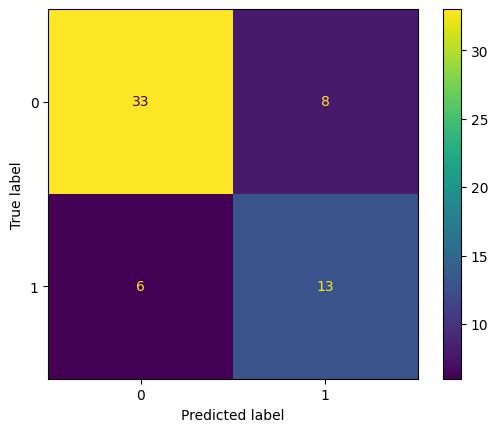

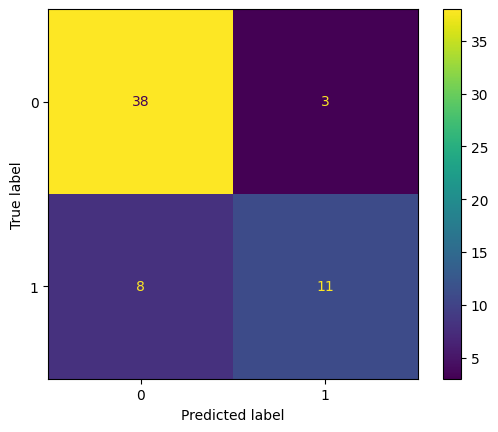

In [441]:
confusion(dt3)
confusion(nb1)

In [ ]:
roc_curve(dt3)
roc_curve(nb1)